### Mental Health Detection Project
- load the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# data reading
df = pd.read_csv('../data/raw_data_mental_health.csv');
df_test = pd.read_csv('../data/raw_data_mental_health.csv');
df = df.iloc[:, 1:-3] 
df.drop(columns=['Country'], inplace=True) 
df.drop(columns=['Occupation'],inplace=True)
print(df.columns)
df['Work_Interest'].unique()

Index(['Gender', 'self_employed', 'family_history', 'treatment',
       'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
       'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
       'Work_Interest'],
      dtype='object')


array(['No', 'Maybe', 'Yes'], dtype=object)

### Normalizing the Dataset

In [3]:
# normalize column names
df.columns= df.columns.str.lower().str.replace(' ', '_')
df.dtypes[df.dtypes == 'object'].index

# for chaning inside the dataframe
str_in_col = list(df.dtypes[df.dtypes == 'object'].index);
for col in str_in_col:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    
# handle missing values
for col in str_in_col:
    df[col] = df[col].fillna('no')
    
# Show columns with exactly 2 unique values (potential binary columns)
binary_like_cols = [col for col in df.columns if df[col].nunique() == 2]  ## no - 0 , yes - 1
print("Binary-like columns:", binary_like_cols)

df.nunique()

Binary-like columns: ['gender', 'self_employed', 'family_history', 'treatment', 'coping_struggles']


gender                   2
self_employed            2
family_history           2
treatment                2
days_indoors             5
growing_stress           3
changes_habits           3
mental_health_history    3
mood_swings              3
coping_struggles         2
work_interest            3
dtype: int64

In [4]:
# Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
le = LabelEncoder()
for col in binary_like_cols:
    df[col] = le.fit_transform(df[col])
    
# multi-class columns
ordinal_cols = [
    'days_indoors',
    'growing_stress',
    'changes_habits',
    'mental_health_history',
    'mood_swings',
    'work_interest'
]

category_orders = [sorted(df[col].dropna().unique()) for col in ordinal_cols]

encoder = OrdinalEncoder(categories=category_orders)
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])


In [5]:
print(df.isnull().sum())
print("unique :\n", df.nunique())  
# check for duplicates
df.head()

gender                   0
self_employed            0
family_history           0
treatment                0
days_indoors             0
growing_stress           0
changes_habits           0
mental_health_history    0
mood_swings              0
coping_struggles         0
work_interest            0
dtype: int64
unique :
 gender                   2
self_employed            2
family_history           2
treatment                2
days_indoors             5
growing_stress           3
changes_habits           3
mental_health_history    3
mood_swings              3
coping_struggles         2
work_interest            3
dtype: int64


,gender,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest
0,0,0,0,1,0.0,2.0,1.0,2.0,2.0,0,1.0
1,0,0,1,1,0.0,2.0,1.0,2.0,2.0,0,1.0
2,0,0,1,1,0.0,2.0,1.0,2.0,2.0,0,1.0
3,0,0,1,1,0.0,2.0,1.0,2.0,2.0,0,1.0
4,0,0,1,1,0.0,2.0,1.0,2.0,2.0,0,1.0


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('treatment', axis=1)  
y = df['treatment']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [7]:
X_train.to_csv('../data/processed/X_train.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)
X_val.to_csv('../data/processed/X_val.csv', index=False)
y_val.to_csv('../data/processed/y_val.csv', index=False)
X_train.columns

Index(['gender', 'self_employed', 'family_history', 'days_indoors',
       'growing_stress', 'changes_habits', 'mental_health_history',
       'mood_swings', 'coping_struggles', 'work_interest'],
      dtype='object')

### Exploratory Data Analysis (EDA)

In [8]:
print("Shape",df.shape)
print("Columns",df.columns)
print(df.isnull().sum()) 

Shape (292364, 11)
Columns Index(['gender', 'self_employed', 'family_history', 'treatment',
       'days_indoors', 'growing_stress', 'changes_habits',
       'mental_health_history', 'mood_swings', 'coping_struggles',
       'work_interest'],
      dtype='object')
gender                   0
self_employed            0
family_history           0
treatment                0
days_indoors             0
growing_stress           0
changes_habits           0
mental_health_history    0
mood_swings              0
coping_struggles         0
work_interest            0
dtype: int64


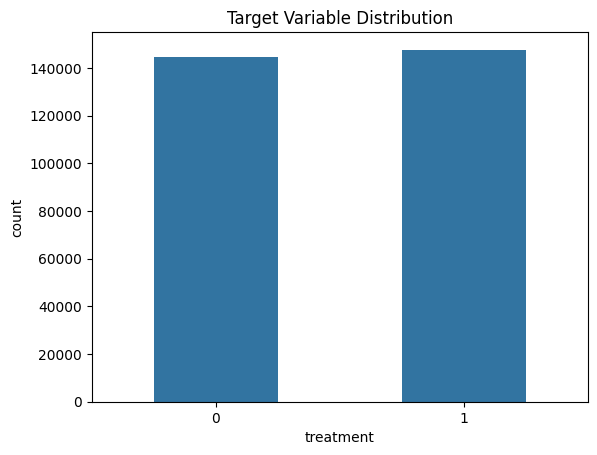

In [9]:
# balance
sns.countplot(x=y,width=0.5)
plt.title("Target Variable Distribution")
plt.show()

In [10]:
for col in X_train.columns:
    print(pd.crosstab(df[col], y, normalize='index') * 100) #0 - no , 1 - yes
    print("-" * 50)
    print(" ");
    
# gender, family history, self-employed >> good in distribution 

treatment          0          1
gender                         
0          30.578512  69.421488
1          53.658537  46.341463
--------------------------------------------------
 
treatment              0          1
self_employed                      
0              50.110184  49.889816
1              44.123697  55.876303
--------------------------------------------------
 
treatment               0          1
family_history                      
0               64.335641  35.664359
1               26.825468  73.174532
--------------------------------------------------
 
treatment             0          1
days_indoors                      
0.0           50.011015  49.988985
1.0           49.300563  50.699437
2.0           49.518162  50.481838
3.0           49.304390  50.695610
4.0           49.363331  50.636669
--------------------------------------------------
 
treatment               0          1
growing_stress                      
0.0             50.027504  49.972496
1.0         

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
# model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

## Evalution

Validation Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.64      0.79      0.71     29040
           1       0.73      0.57      0.64     29433

    accuracy                           0.68     58473
   macro avg       0.69      0.68      0.67     58473
weighted avg       0.69      0.68      0.67     58473

Test Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.65      0.79      0.71     28943
           1       0.73      0.58      0.65     29530

    accuracy                           0.68     58473
   macro avg       0.69      0.68      0.68     58473
weighted avg       0.69      0.68      0.68     58473

Accuracy: 0.68
Precision: 0.73
Recall: 0.58
F1 Score: 0.65
AUC-ROC: 0.71
              precision    recall  f1-score       support
0              0.646501  0.787202  0.709948  28943.000000
1              0.734880  0.578124  0.647145  29530.000000
accuracy       0.681614  0.681614  0.681614      0.68

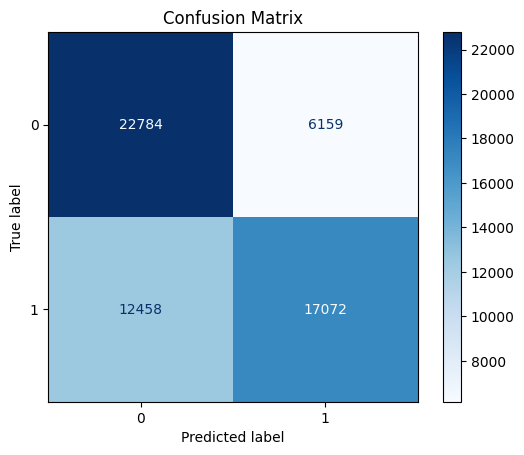

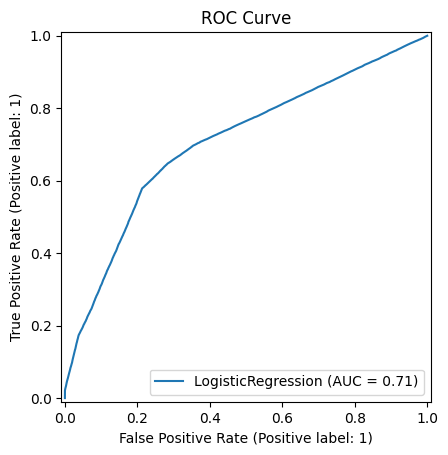

In [12]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, precision_score, recall_score, f1_score
# Predict on validation set
y_val_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_acc:.2f}")
print(classification_report(y_val, y_val_pred))
#Predict on test set
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.2f}")
print(classification_report(y_test, y_test_pred))

# Predict
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

# Print scores
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.2f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_test_proba):.2f}")

# Classification Report
print(pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).T)

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())

0.6715087764563118


## Saving Model

In [14]:
import joblib
import os

os.makedirs("models", exist_ok=True)
joblib.dump(model, "../models/mental_health_model.pkl")
joblib.dump(encoder, "../models/ordinal_encoder.pkl")

['../models/ordinal_encoder.pkl']